# Pembacaan Data

In [82]:
import cv2
import graphviz
import numpy as np
import os
import shutil
import urllib.request

from skimage import img_as_ubyte
from skimage.feature import graycomatrix, graycoprops
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from google.colab.patches import cv2_imshow

In [3]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Membuat Subfolder

In [ ]:
# Menentukan path
base_path = "/content/drive/MyDrive/tugas-akhir-pcd/dataset"
paths = ["train", "valid"]
# Membuat subdirektori baru untuk data train dan val yang masing-masing berisi folder class FRESH, HALF-FRESH, dan SPOILED
classes = ["FRESH","HALF-FRESH","SPOILED"]
for i in range(len(paths)):
    for j in range(len(classes)):
        sub_folder = os.path.join(paths[i], classes[j])
        os.makedirs(os.path.join(base_path, sub_folder))

## Pengisian Gambar ke Subfolder


In [ ]:
# Mengisi gambar ke folder class yang sesuai (data train)
base_dir = "/content/drive/MyDrive/tugas-akhir-pcd/dataset_raw"
train_path = os.path.join(base_dir, "train")
"""For train."""
for filename in os.listdir(train_path):
    if filename.rfind("FRESH") == 0:
        shutil.copy(os.path.join(train_path,filename),base_path + "/train/FRESH")
    elif filename.rfind("HALF-FRESH") == 0:
        shutil.copy(os.path.join(train_path,filename),base_path + "/train/HALF-FRESH")
    elif filename.rfind("SPOILED") == 0:
        shutil.copy(os.path.join(train_path,filename),base_path + "/train/SPOILED")
    else:
        pass

In [6]:
base_dir = "/content/drive/MyDrive/tugas-akhir-pcd/dataset_raw"
print(len(os.listdir(base_dir + "/train/")))
print(len(os.listdir(base_dir + "/valid/")))

1816
452


In [ ]:
# Mengisi gambar ke folder class yang sesuai (data val)
val_path = os.path.join(base_dir, "valid")
"""For validation."""
for filename in os.listdir(val_path):
    if filename.rfind("FRESH") == 0:
        shutil.copy(os.path.join(val_path,filename),base_path + "/valid/FRESH")
    elif filename.rfind("HALF-FRESH") == 0:
        shutil.copy(os.path.join(val_path,filename),base_path + "/valid/HALF-FRESH")
    elif filename.rfind("SPOILED") == 0:
        shutil.copy(os.path.join(val_path,filename),base_path + "/valid/SPOILED")
    else:
        pass

In [5]:
# Pengecekan jumlah data
base_path = "/content/drive/MyDrive/tugas-akhir-pcd/dataset"
train_FRESH = len(os.listdir(base_path + "/train/FRESH"))
train_HALF_FRESH = len(os.listdir(base_path + "/train/HALF-FRESH"))
train_SPOILED = len(os.listdir(base_path + "/train/SPOILED"))
total_train = train_FRESH + train_HALF_FRESH + train_SPOILED

valid_FRESH = len(os.listdir(base_path + "/valid/FRESH"))
valid_HALF_FRESH = len(os.listdir(base_path + "/valid/HALF-FRESH"))
valid_SPOILED = len(os.listdir(base_path + "/valid/SPOILED"))
total_valid = valid_FRESH + valid_HALF_FRESH + valid_SPOILED

print("Training :")
print("================")
print(f"FRESH: {train_FRESH}")
print(f"HALF-FRESH: {train_HALF_FRESH}")
print(f"SPOILED: {train_SPOILED}")
print(f"Total Data: {total_train}")
print("")
print("Validation :")
print("================")
print(f"FRESH: {valid_FRESH}")
print(f"HALF-FRESH: {valid_HALF_FRESH}")
print(f"SPOILED: {valid_SPOILED}")
print(f"Total Data: {total_valid}")
print("")
print(f"Percentage Training Data: {total_train/(total_train+total_valid)*100} %")
print(f"Percentage Validation Data: {total_valid/(total_train+total_valid)*100} %")

Training :
FRESH: 675
HALF-FRESH: 630
SPOILED: 510
Total Data: 1815

Validation :
FRESH: 178
HALF-FRESH: 159
SPOILED: 114
Total Data: 451

Percentage Training Data: 80.09708737864078 %
Percentage Validation Data: 19.902912621359224 %


# Praproses Data

## Normalisasi Data Gambar

In [17]:
def read_image(file_path):
  image = cv2.imread(file_path, 0)  # Membaca data dalam format grayscale
  image = cv2.resize(image, (150, 150))  # Mengubah ukuran gambar menjadi 150x150 piksel
  image = image.astype(np.float32) / 255.0  # Normalisasi gambar menjadi 0-1
  return image

# Pembuatan Model

In [98]:
def get_list_path_file(name):
  files = []
  labels = []
  # Mendefinisikan path direktori data train dan validasi
  base_path = "/content/drive/MyDrive/tugas-akhir-pcd/dataset/"
  path_dir = os.path.join(base_path, name)
  for class_name in os.listdir(path_dir):
    class_dir = os.path.join(path_dir, class_name)
    for file_name in os.listdir(class_dir):
      file_path = os.path.join(class_dir, file_name)
      files.append(file_path)
      labels.append(class_name)
  return files, labels

## Model 1: Tanpa Feature Engineering

In [127]:
# Mendapatkan list path file gambar dan label kelas dari data train
train_files, train_labels = get_list_path_file("train")

# Mendapatkan list path file gambar dan label kelas dari data validasi
valid_files, valid_labels = get_list_path_file("valid")

# Membaca dan memproses gambar untuk data train
X_train = np.array([read_image(file_path) for file_path in train_files])
y_train = np.array(train_labels)

# Membaca dan memproses gambar untuk data validasi
X_valid = np.array([read_image(file_path) for file_path in valid_files])
y_valid = np.array(valid_labels)

# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier()
X_train = np.reshape(X_train, (X_train.shape[0], -1))
model.fit(X_train, y_train)

# Melakukan prediksi pada data validasi
X_valid = np.reshape(X_valid, (X_valid.shape[0], -1))
y_pred = model.predict(X_valid)

# Menghitung akurasi model
accuracy = accuracy_score(y_pred, y_valid)
print("Akurasi model Decision Tree: ", accuracy)

Akurasi model Decision Tree:  0.6119733924611973


## Model 2: Dengan Feature Engineering GLCM

In [128]:
# Fungsi untuk ekstraksi fitur GLCM
def extract_glcm_features(image):
  # Konversi gambar menjadi tipe data unsigned integer
  image = img_as_ubyte(image)
  # Hitung matriks GLCM
  glcm = graycomatrix(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
  # Ekstraksi fitur dari matriks GLCM
  contrast = graycoprops(glcm, 'contrast')
  energy = graycoprops(glcm, 'energy')
  correlation = graycoprops(glcm, 'correlation')
  homogeneity = graycoprops(glcm, 'homogeneity')
  return np.concatenate([contrast, energy, correlation, homogeneity])

In [129]:
# Mendapatkan list path file gambar dan label kelas dari data train
train_files, train_labels = get_list_path_file("train")

# Mendapatkan list path file gambar dan label kelas dari data validasi
valid_files, valid_labels = get_list_path_file("valid")

# Membaca dan memproses gambar untuk data train
X_train = np.array([read_image(file_path) for file_path in train_files])
y_train = np.array(train_labels)

# Ekstraksi fitur GLCM untuk setiap gambar dalam data train
X_train_features = np.array([extract_glcm_features(image) for image in X_train])
X_train_features = np.reshape(X_train_features, (X_train_features.shape[0], -1))

# Membaca dan memproses gambar untuk data validasi
X_valid = np.array([read_image(file_path) for file_path in valid_files])
y_valid = np.array(valid_labels)

# Ekstraksi fitur GLCM untuk setiap gambar dalam data validasi
X_valid_features = np.array([extract_glcm_features(image) for image in X_valid])
X_valid_features = np.reshape(X_valid_features, (X_valid_features.shape[0], -1))

# Membuat dan melatih model Decision Tree dengan fitur yang diekstraksi
model = DecisionTreeClassifier()
model.fit(X_train_features, y_train)

# Melakukan prediksi pada data validasi
y_pred = model.predict(X_valid_features)

# Menghitung akurasi model
accuracy = accuracy_score(y_pred, y_valid)
print("Akurasi model Decision Tree setelah Feature Engineering: ", accuracy)

Akurasi model Decision Tree setelah Feature Engineering:  0.7405764966740577


In [102]:
filtered_list = list(filter(lambda x: x == 'FRESH', y_pred))
len(filtered_list)

168

In [103]:
filtered_list = list(filter(lambda x: x == 'FRESH', y_valid))
len(filtered_list)

178

In [104]:
count = 0
for pred, valid in zip(y_pred, y_valid):
    if pred == 'FRESH' and valid == 'FRESH':
        count += 1

print("Total elemen yang sama bernilai 'FRESH':", count)

Total elemen yang sama bernilai 'FRESH': 131


In [105]:
count = 0
for pred, valid in zip(y_pred, y_valid):
    if pred == 'HALF-FRESH' and valid == 'HALF-FRESH':
        count += 1

print("Total elemen yang sama bernilai 'HALF-FRESH':", count)

Total elemen yang sama bernilai 'HALF-FRESH': 107


In [106]:
count = 0
for pred, valid in zip(y_pred, y_valid):
    if pred == 'SPOILED' and valid == 'SPOILED':
        count += 1

print("Total elemen yang sama bernilai 'SPOILED':", count)

Total elemen yang sama bernilai 'SPOILED': 101


In [ ]:
## KESIMPULAN: 0 -> FRESH, 1 -> HALF-FRESH, 2 -> SPOILED

# Evaluasi Model

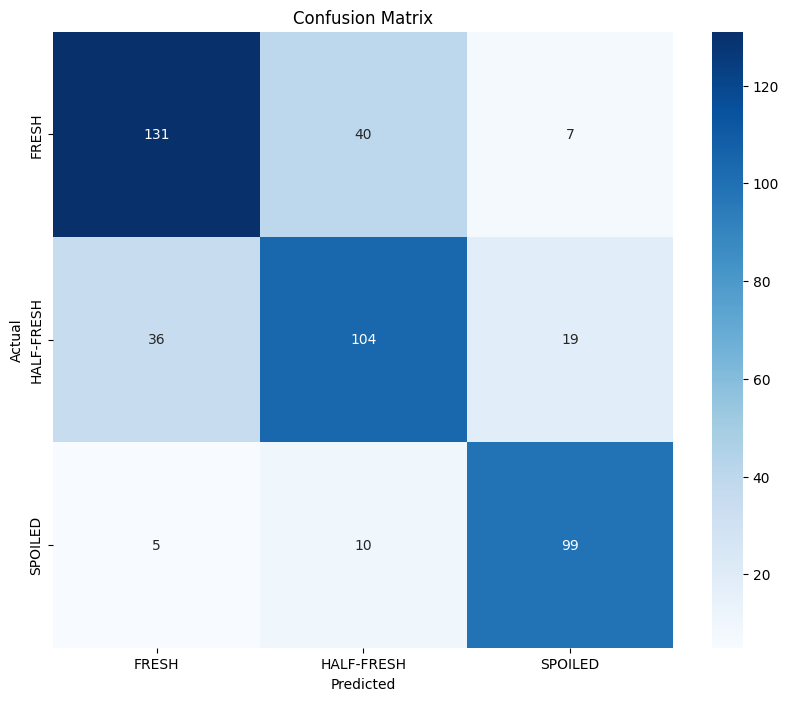

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['FRESH', 'HALF-FRESH', 'SPOILED'], yticklabels=['FRESH', 'HALF-FRESH', 'SPOILED'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Menghitung matriks kebingungan
cm = confusion_matrix(y_valid, y_pred)

# Menghitung akurasi
accuracy = accuracy_score(y_valid, y_pred)

# Menghitung presisi
precision = precision_score(y_valid, y_pred, average='macro')

# Menghitung recall
recall = recall_score(y_valid, y_pred, average='macro')

# Menghitung f1-score
f1 = f1_score(y_valid, y_pred, average='macro')

# Menghitung error rate
error_rate = (cm.sum() - np.trace(cm)) / cm.sum()

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Error Rate:", error_rate)

Confusion Matrix:
[[131  40   7]
 [ 36 104  19]
 [  5  10  99]]
Accuracy: 0.7405764966740577
Precision: 0.7429841941004732
Recall: 0.7528213863752732
F1-score: 0.7471866842102249
Error Rate: 0.25942350332594233


In [132]:
# Membuat visualisasi model Decision Tree
dot_data = export_graphviz(model, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Simpan visualisasi ke file "decision_tree.pdf"

'decision_tree.pdf'

# Melakukan Prediksi

In [133]:
# Fungsi untuk membaca gambar dari URL
def read_image_from_url(url, mode=1):
    resp = urllib.request.urlopen(url)
    image_bytes = resp.read()
    image_arr = np.asarray(bytearray(image_bytes), dtype=np.uint8)
    if mode == 0:
      image = cv2.imdecode(image_arr, cv2.IMREAD_GRAYSCALE)  # Membaca gambar dalam mode grayscale
    elif mode == 1:
      image = cv2.imdecode(image_arr, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (150, 150))  # Meresize gambar ke ukuran 150x150
    return image

Prediksi kelas gambar baru: ['FRESH']



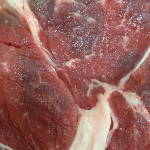


['FRESH' 'HALF-FRESH' 'SPOILED']
[[1. 0. 0.]]


In [139]:
"""
Referensi Gambar:
(BERHASIL DIIDENTIFIKASI) 
1. "https://98.img.avito.st/1280x960/3644477498.jpg" (FRESH)
2. "https://37.img.avito.st/image/1/1.UECG37aB_Knweg6vqroie1R8-K8kevyvQx_4r_B6Dq8wePCtMH787Q.yO4OD3eYrRK3YmzlU8g6yoiKbR4K3_xw-GNfX0fWd0k" (HALF-FRESH)
3. "https://fastly.4sqi.net/img/general/600x600/3640854_UpsidPcJD2LSU2axzMAplnvkNOmEn2PtPamORnll8C0.jpg" (SPOILED)
4. 
5. 

(GAGAL DIIDENTIFIKASI)
1. "https://fastly.4sqi.net/img/general/600x600/43665752_lzE6KW4jE6P4U4DL9fjaz52qgcEw8ocUcmw2_QEUrNU.jpg" (HARUSNYA HALF-FRESH)
2. "https://fastly.4sqi.net/img/general/600x600/58251572_lhqKay7QupsA139u0MlVXD7EIJGSJi1KkneCNl4Pq0U.jpg" (HARUSNYA SPOILED)
3. "https://fastly.4sqi.net/img/general/600x600/9216480__BXQ4-vLaKt3jMp_nFxzNZFDHFCfUx_7zeA9bKjcNNA.jpg" (HARUSNYA FRESH)
4. 
5. 

[ULANGI PREDIKSI SETIAP REBUILD MODEL] -> LAKUKAN UNTUK SETIAP URL DAN CEK APAKAH BERHASIL ATAU GAGAL
"""

# Membaca gambar
image_url = "https://fastly.4sqi.net/img/general/600x600/58251572_lhqKay7QupsA139u0MlVXD7EIJGSJi1KkneCNl4Pq0U.jpg"
image = read_image_from_url(image_url, 0)
image_colored = read_image_from_url(image_url)

# Ekstraksi fitur pada gambar baru
new_features = extract_glcm_features(image)  # Atau metode ekstraksi fitur lain yang sesuai

# Reshape fitur gambar baru
new_features = np.reshape(new_features, (1, -1))

# Lakukan prediksi terhadap gambar baru
prediction = model.predict(new_features)

# Tampilkan hasil prediksi
proba = model.predict_proba(new_features, (1, -1))
print("Prediksi kelas gambar baru:", prediction)
print()
cv2_imshow(image_colored)
print()
print(model.classes_)
print(proba)